# EDA

In [8]:
# Import libraries
import pandas as pd
import numpy as np

from datetime import datetime
import calendar

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [9]:
# Load data
df = pd.read_csv('data/clean_df.csv')

In [10]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [11]:
# date: make index and convert to datetime 
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-03-26', '2015-03-26', '2015-03-26', '2015-03-26',
               '2015-03-26', '2015-03-26', '2015-03-26', '2015-03-26',
               '2015-03-26', '2015-03-26',
               ...
               '2020-12-29', '2020-12-30', '2020-12-30', '2020-12-30',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=22485, freq=None)

In [14]:
# Create year, month, and weekday columns from datetime index to look at frequency of atttacks based on time....
df.index.dtype


dtype('<M8[ns]')

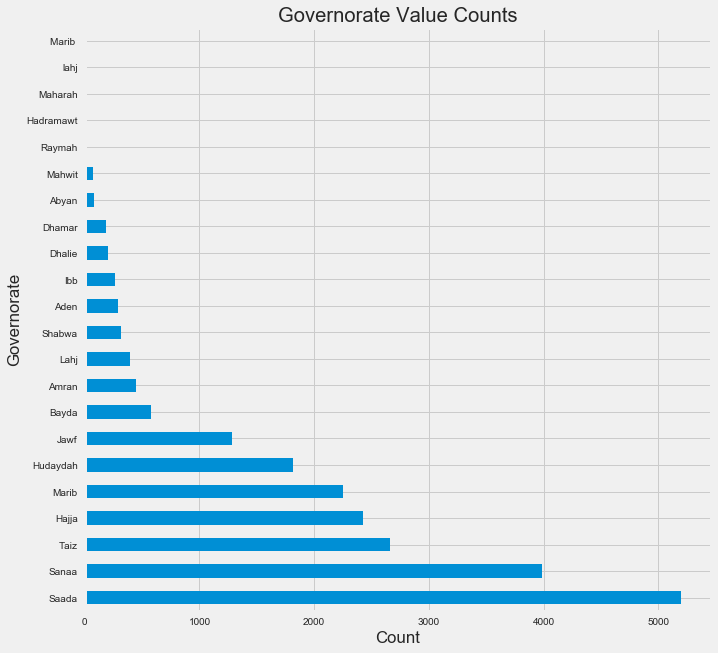

In [142]:
# Value counts for governorate
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count');

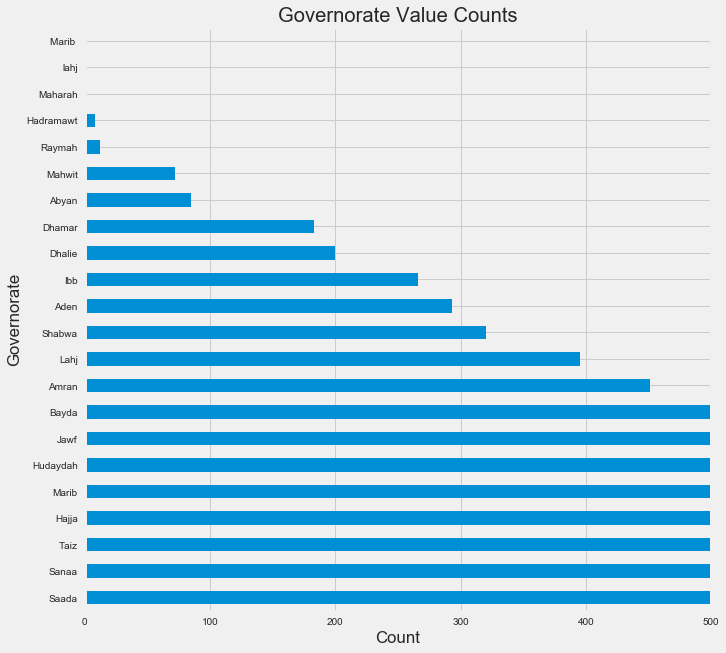

In [143]:
# Value counts for governorate with more granularity for the smaller values
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count')
plt.xlim(0, 500);

In [144]:
district_vals =  df['district'].value_counts().loc[lambda x : x>100] 

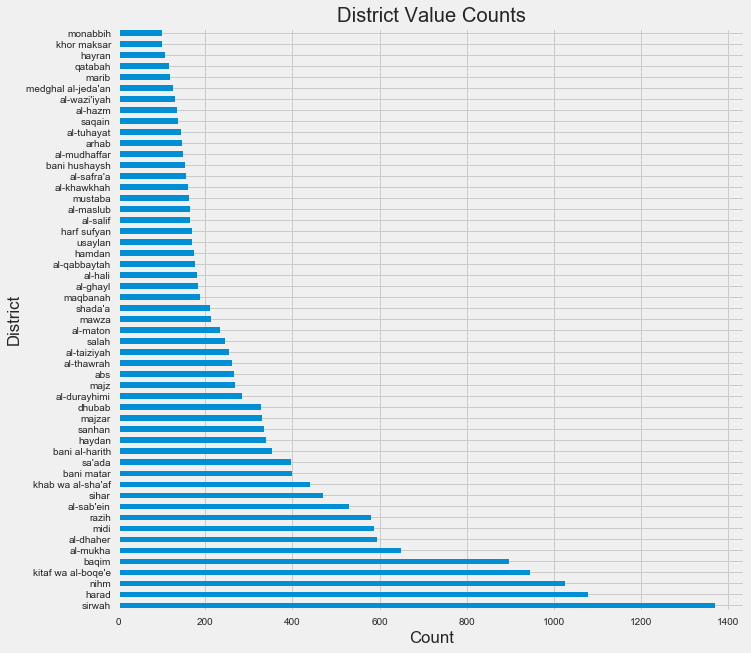

In [145]:
# Value counts for district where value counts is greater than 100 
district_vals.plot(kind='barh', figsize=(10,10))
plt.title('District Value Counts')
plt.ylabel('District')
plt.xlabel('Count');

In [146]:
area_vals = df['area'].value_counts().loc[lambda x : x>100] 

In [147]:
area_vals # what is this - ?? Need to go back and clean that up

-                    4360
Unknown              3300
The City              250
Al-Nahdain            247
Al-Rahabah            177
Al-Omary              145
Marran                139
Al-Mukha junction     135
Al-Jabbanah           134
Faj Attan             113
Noqom mountain        102
Name: area, dtype: int64

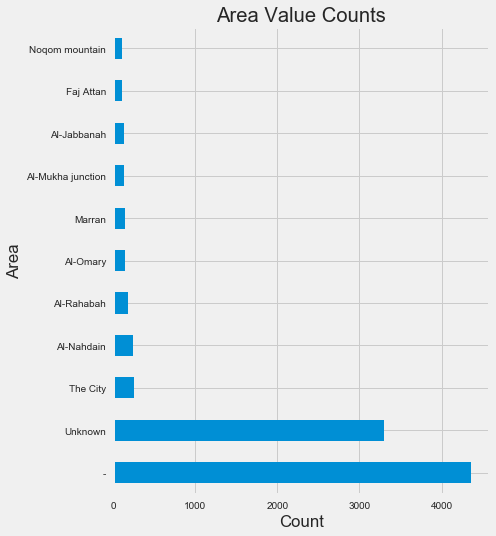

In [148]:
# Value counts for area where val counts greater than 100
area_vals.plot(kind='barh', figsize=(6,8))
plt.title('Area Value Counts')
plt.ylabel('Area')
plt.xlabel('Count');

In [149]:
df.columns

Index(['incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

In [150]:
# value counts for area when dropping 'unknown' and - 
df['area'].replace(['-', 'Unknown'], np.nan)

date
2015-03-26                     Al-Rahabah
2015-03-26                        Airport
2015-03-26       Al-Sonblah Neighbourhood
2015-03-26                     Al-Nahdain
2015-03-26                     Al-Nahdhah
                         ...             
2020-12-31    Raymat Humayd Military Camp
2020-12-31    Raymat Humayd Military Camp
2020-12-31                     Wadi Rijam
2020-12-31                     Ar Rahabah
2020-12-31                            NaN
Name: area, Length: 22485, dtype: object

In [153]:
df['target'].value_counts()

Unknown                                                               8364
Pro-Houthi forces                                                     2123
Residential Area                                                       590
Pro-Houthi sites                                                       403
Pro-Houthi positions                                                   396
                                                                      ... 
Sabir Military Camp                                                      1
Higher Institute for teachers                                            1
House ( belongs to the houthis spokesperson Mohammed Abdulsalam )        1
Pro-Houthi vehicles                                                      1
Near Al Layl market                                                      1
Name: target, Length: 2884, dtype: int64

In [154]:
target_vals =  df['target'].value_counts().loc[lambda x : x>200] 

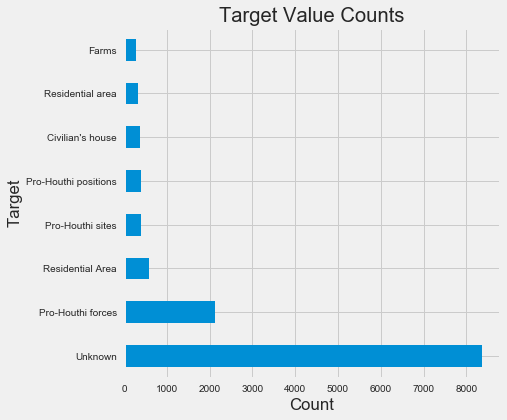

In [155]:
# Value counts for target ## may want to drop unkown to look at this 
target_vals.plot(kind='barh', figsize=(6,6))
plt.title('Target Value Counts')
plt.ylabel('Target')
plt.xlabel('Count');

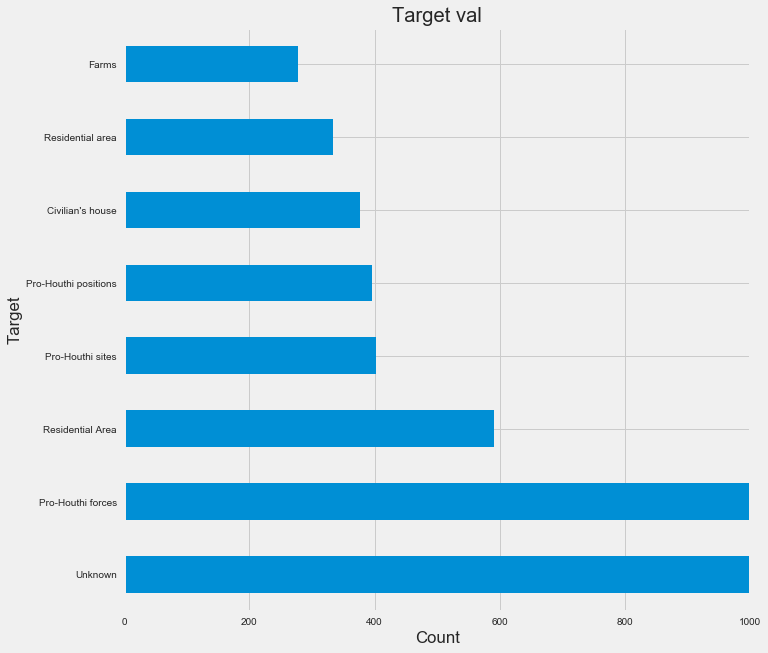

In [157]:
# Value counts for target with more granularity
target_vals.plot(kind='barh', figsize=(10,10))
plt.title('Target val')
plt.ylabel('Target')
plt.xlabel('Count')
plt.xlim(0, 1000);